In [1]:
%matplotlib inline
from tqdm import tqdm
import numpy as np
import pymc3 as pm
np.set_printoptions(suppress=True)
import re

/Users/ded/anaconda3/lib/python3.6/site-packages/theano/gpuarray/dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
Using cuDNN version 7201 on context None
Mapped name None to device cuda: GeForce GTX 1080 Ti (0000:86:00.0)
/Users/ded/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, varnames=varnames, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             pm.summary(trcs,varnames=varnames).iterrows()})

    for i, mn in enumerate(pm.summary(trcs, varnames=varnames)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')
def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

[ 0 16  4  0  0  7  0 17  5  0]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta, alpha]
100%|██████████| 100500/100500 [03:17<00:00, 508.92it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.34,0.15,0.00,0.09,0.65,99625.58,1.0
beta,6.42,2.14,0.01,2.78,10.00,112504.23,1.0


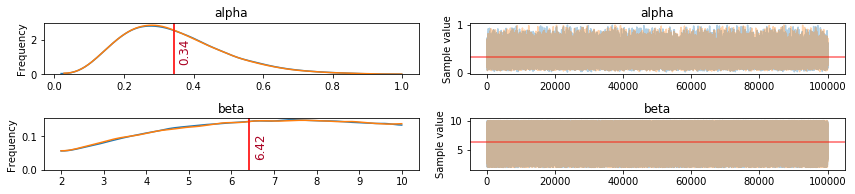

In [3]:
data = pm.BetaBinomial.dist(.25, 5., 100).random(size = 10)
print(data)
with pm.Model() as model:
    a = pm.Uniform('alpha', 0., 1.)
    b = pm.Uniform('beta', 2, 10)
    dis1 = pm.BetaBinomial('betabin', a, b, n = 100 , observed=data)
    posterior = pm.sample(100000, cores=1)
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
plot_traces(posterior, varnames=rvs);
pm.summary(posterior).round(2)

[ 7  0  2  0  8 15  0  7  5  2  4  4  0 37  0 10  7  7  0  1  0  0  0 14
  0  3  0  0  0  0 12  3  0  3  4  1  2  0  0  0  0  0  1  0 21  0  0  0
  1  0  3  0  3  0  2 14  0  1  0  0  3  0 10  0  0  9  9  2  0  4  0 10
  0  9  0  0  3  4 18  0 50  0  6 78  0  7 23  0  0  1  0 16  3  0  0  7
  1  0  0  1]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta2, alpha2]
100%|██████████| 100500/100500 [04:00<00:00, 417.94it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha2,0.23,0.04,0.0,0.16,0.31,87788.76,1.0
beta2,4.47,1.09,0.0,2.46,6.62,87505.12,1.0


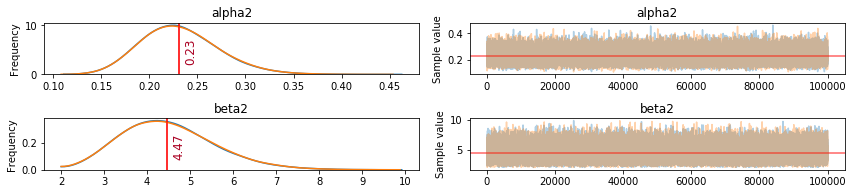

In [4]:
data2 = pm.BetaBinomial.dist(.25, 5., 100).random(size = 100)
print(data2)
with pm.Model() as model2:
    a2 = pm.Uniform('alpha2', 0., 1.)
    b2 = pm.Uniform('beta2', 2, 10)
    dis2 = pm.BetaBinomial('betabin2', a2, b2, n = 100 , observed=data2)
    post2 = pm.sample(100000, cores=1)
    
rvs = [rv.name for rv in strip_derived_rvs(model2.unobserved_RVs)]
plot_traces(post2, varnames=rvs);
pm.summary(post2).round(2)

[ 0  0  7 11 36  1  6  0  0 11 28  0  0  0  1 13  1  0  0  0  0  0  2  4
  0  0  0  0  5  1  6  0  0  2 11  0  0  0  0  0  1 11  3  0  1  0  0  9
  0  5  6 10  0  1  0  0  0  1  4 12  0  0  0  0 14  0  0 10  0 15  1  0
 60 29  0 20  0  1  9  0 35  1  9  2  0  1  1 14  8 22  0  2  0  1  0  1
  5  0  0  2  0 34  0  0 14  0  3  0  6  7 10  0  9  0  1  3 10  4  1 35
  4  0  2  2  1 17  1  0 37  0  1  6  0  0  0  0  1  0 20  3  0  8  0  0
 14  0  1  0 24  0  1  0  5 30  0 15 18  0  0  0  9  0  0  3  0  0  6  3
  0  6  7  0  0  0  0  0  2  1  0  2  8  3  5  4  0  1  4  0  0  3  0 34
  0  1  0  0  4 17  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  1
  5  0  0  0  7  0  2  0 22  1  0  0  0  7  2  0  5  0  2  0  0  1  0  0
  5  0  1 16 46  1  0 16  2 24  8  0 14 19  0  0 15  0  0  0  0  0  1  0
  0  0  9  0  0  0  1  3  1  3  2  0  0  0  3  0  0  0  2  1  0  1  0  1
  3  4  0  0  0  3  0  0  1  0  1  0 18 13 14  5  5  0  1 30 12  0  1  1
  0  1  0  0  0  2  2  0  1  1  0  0  1  0  7  0  8

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta3, alpha3]
100%|██████████| 100500/100500 [05:31<00:00, 303.59it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha3,0.25,0.01,0.0,0.22,0.28,89700.69,1.0
beta3,5.42,0.43,0.0,4.58,6.27,88552.68,1.0


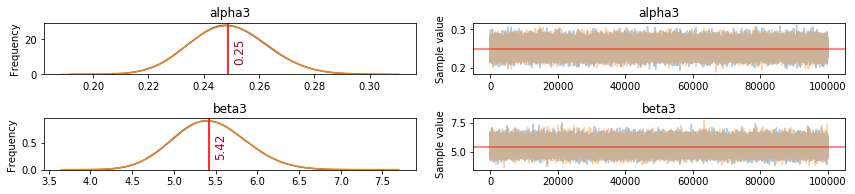

In [9]:
data3 = pm.BetaBinomial.dist(.25, 5., 100).random(size = 1000)
print(data3)
with pm.Model() as model3:
    a3 = pm.Uniform('alpha3', 0., 1.)
    b3 = pm.Uniform('beta3', 2, 10)
    dis3 = pm.BetaBinomial('betabin2', a3, b3, n = 100 , observed=data3)
    post3 = pm.sample(100000, cores=1)
    
rvs = [rv.name for rv in strip_derived_rvs(model3.unobserved_RVs)]
plot_traces(post3, varnames=rvs);
pm.summary(post3).round(2)

[ 0  0  0 ... 17  0  3]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta4, alpha4]
100%|██████████| 100500/100500 [04:05<00:00, 409.13it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha4,0.26,0.00,0.0,0.25,0.26,88452.56,1.0
beta4,5.18,0.13,0.0,4.92,5.43,85343.93,1.0


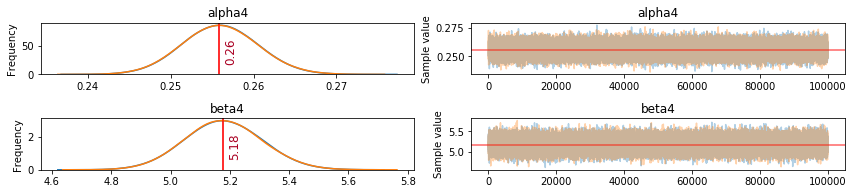

In [7]:
data4 = pm.BetaBinomial.dist(.25, 5., 100).random(size = 10000)
print(data4)
with pm.Model() as model4:
    a4 = pm.Uniform('alpha4', 0., 1.)
    b4 = pm.Uniform('beta4', 2, 10)
    dis4 = pm.BetaBinomial('betabin4', a4, b4, n = 100 , observed=data4)
    post4 = pm.sample(100000, cores=1)
rvs = [rv.name for rv in strip_derived_rvs(model4.unobserved_RVs)]
plot_traces(post4, varnames=rvs);
pm.summary(post4).round(2)

[0 0 2 ... 0 0 8]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta5, alpha5]
100%|██████████| 100500/100500 [26:03<00:00, 64.28it/s]
The acceptance probability does not match the target. It is 0.8856304786098411, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9030162723068695, but should be close to 0.8. Try to increase the number of tuning steps.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha5,0.25,0.00,0.0,0.24,0.25,74972.75,1.0
beta5,4.94,0.04,0.0,4.86,5.01,73882.80,1.0


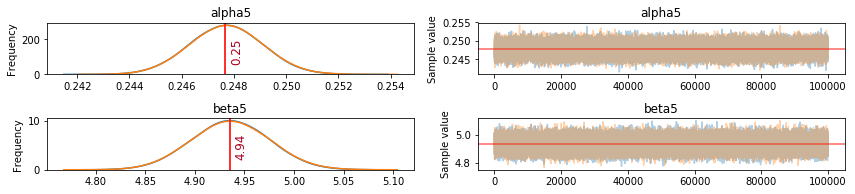

In [8]:
data5 = pm.BetaBinomial.dist(.25, 5., 100).random(size = 100000)
print(data5)
with pm.Model() as model5:
    a5 = pm.Uniform('alpha5', 0., 1.)
    b5 = pm.Uniform('beta5', 2, 10)
    dis5 = pm.BetaBinomial('betabin5', a5, b5, n = 100 , observed=data5)
    post5 = pm.sample(100000, cores=1)
rvs = [rv.name for rv in strip_derived_rvs(model5.unobserved_RVs)]
plot_traces(post5, varnames=rvs);
pm.summary(post5).round(2)

### With more individuals we can recover the alpha/beta parameters!
### Let's try if we actually need many samples?

[0 2 0 ... 0 2 0]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [beta5, alpha5]
100%|██████████| 10500/10500 [00:45<00:00, 229.79it/s]
The acceptance probability does not match the target. It is 0.8989589784336875, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9099156596631188, but should be close to 0.8. Try to increase the number of tuning steps.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha5,0.25,0.00,0.0,0.25,0.25,15454.06,1.0
beta5,5.05,0.04,0.0,4.97,5.12,15646.84,1.0


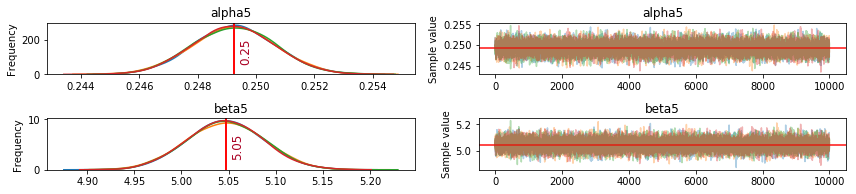

In [6]:
data5 = pm.BetaBinomial.dist(.25, 5., 100).random(size = 100000)
print(data5)
with pm.Model() as model5:
    a5 = pm.Uniform('alpha5', 0., 1.)
    b5 = pm.Uniform('beta5', 2, 10)
    dis5 = pm.BetaBinomial('betabin5', a5, b5, n = 100 , observed=data5)
    post5 = pm.sample(10000, chains = 4, cores=1)
rvs = [rv.name for rv in strip_derived_rvs(model5.unobserved_RVs)]
plot_traces(post5, varnames=rvs);
pm.summary(post5).round(2)